<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="500">

# Андан на экономе: домашнее задание 4
</center>


> Если орел, я выиграла. Если решка, ты проиграл.

$\qquad$ $\qquad$ $\qquad$ $\qquad$  **[Рейчел из Друзей](https://www.youtube.com/watch?v=TV9ghItJ2Ms)**

**ФИО:** Иванов Андрей Александрович

## Общая информация

__Дата выдачи:__ 20.05.2024

__Дедлайн:__ 23:59MSK 10.06.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 1: обязательная 

За эту часть можно получить 100 баллов.

### Задача №1: Лучше найди себе девушку! (15 баллов)

В этой задаче вам предстоит проверить несколько гипотез на датасете из американского сервиса знакомств. Датасет называется `dating_is_hard.csv`

Колонки датасета:
- `age` - возраст
- `is_heavy_drinker` - алкоголизм в булевом виде
- `height` - рост в дюймах
- `sex` - полов может быть только два - f для женщин и m для мужчин.
- `smokes` - зависимость от табака в булевом виде
- `location` - место жительства
- `offspring` - отношение к детям

Для каждого пункта нужно расписать нулевую и альтернативную гипотезу, описать какой именно критерий вы используете, перечислить предпослыки необходимые для его использования, а также вычислить значение статистики и p-value, если это возможно.

In [2]:
df = pd.read_csv('https://github.com/hse-econ-data-science/andan2024/raw/main/hw/data/dating_is_hard.csv')
df

,Unnamed: 0,age,is_heavy_drinker,height,sex,smokes,location,offspring
0,uid_1,27,False,64,f,True,san francisco california,no opinion
1,uid_2,38,False,65,f,False,oakland california,wants kids
2,uid_3,31,False,70,m,True,san francisco california,does not have kids
3,uid_4,29,False,66,m,False,martinez california,does not have kids
4,uid_5,30,False,69,m,True,san francisco california,no opinion
...,...,...,...,...,...,...,...,...
995,uid_996,18,False,67,m,True,vallejo california,no opinion
996,uid_997,21,False,70,m,False,san francisco california,does not have kids
997,uid_998,30,False,73,m,False,oakland california,does not have kids
998,uid_999,49,False,71,m,False,san francisco california,no opinion


__a) [5 баллов]__ Рост в приложениях для знакомств не проверяют, поэтому можно поставить себе любой и никто не узнает. Посмотрим же, врут ли люди о своём росте.

Проверьте две гипотезы: совпадает ли средний рост мужчин в приложении с их реальным средним ростом и совпадает ли средний рост женщин в приложении с их реальным средним ростом

__P.S.__ Средний рост мы вам не дамим. Ищите сами и приложите ссылку на источник в решении.

https://www.worlddata.info/average-bodyheight.php#:~:text=Average%20sizes%20of%20men%20and,a%20height%20of%201.63%20m.

Средний рост мужчин в США 177 см = 69.7 дюймов, женщин - 163 см = 64.2 дюймов

Гипотеза $H_0$: средний рост не завышается

Гипотеза $H_1$: средний рост завышается

### Предпосылки:

Выборки взяты случайным образом.

Рост в выборке распределен нормально (по ЦПТ)

Дисперсия выборки (стандартное отклонение) конечна.

In [3]:
men_height = df[df['sex'] == 'm']['height']
women_height = df[df['sex'] == 'f']['height']

real_men_height_mean = 69.7
real_women_height_mean = 64.2
men_height_mean = men_height.mean()
women_height_mean = women_height.mean()

t_stat_men, p_value_men = stats.ttest_1samp(men_height, real_men_height_mean)
t_stat_women, p_value_women = stats.ttest_1samp(women_height, real_women_height_mean)

print(f"Men's height t-statistic: {t_stat_men}, p-value: {p_value_men}")
print(f"Women's height t-statistic: {t_stat_women}, p-value: {p_value_women}")

Men's height t-statistic: 5.133289633815099, p-value: 3.8540211769877894e-07
Women's height t-statistic: 4.674696319103778, p-value: 4.0335780148742785e-06


__Вывод:__ средний рост пользователями приложения для знакомоств завышается.

__б) [5 баллов]__ По моим наблюдениям (состоящим из одного человека) мужчин-алкоголиков гораздо больше женщин. В нашем датасете алкоголизмом мы будем считать параметр `is_heavy_drinker`

Проверьте гипотезу: Действительно ли доля мужчин-алкоголиков выше доли женщин-алкоголиков?

Гипотеза $H_0$: мужчины и женщины одинаково часто являются алкоголиками

Гипотеза $H_1$: мужчины чаще являются алкоголиками

### Предпосылки:

Выборки взяты случайным образом.

Дисперсия долей пропорциональна.

Наблюдения независимы друг от друга.

Выборки достаточно большие, чтобы применять Z-test

In [4]:
from statsmodels.stats.proportion import proportions_ztest

num_men_drinkers = df[(df['sex'] == 'm') & (df['is_heavy_drinker'] == True)].shape[0]
num_women_drinkers = df[(df['sex'] == 'f') & (df['is_heavy_drinker'] == True)].shape[0]

total_men = df[df['sex'] == 'm'].shape[0]
total_women = df[df['sex'] == 'f'].shape[0]

count = np.array([num_men_drinkers, num_women_drinkers])
nobs = np.array([total_men, total_women])

z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')

print(f"p-value: {p_value}")

p-value: 0.33597051196139227


__Вывод:__ мужчины и женщины одинаково часто становятся алкоголиками

__в) [5 баллов]__ Мой друг Володька решил бросить курить и теперь курит только когда пьёт. Это навело меня на мысль о том, что курение привлекает алкоголиков сильнее, чем обычных людей.

Проверьте гипотезу: Действительно ли алкоголики больше склонны к курению, чем неалкоголики?

Гипотеза $H_0$: алкоголики и неалкоголики одинаково склонны к курению

Гипотеза $H_1$: алкоголики более склонны к курению

### Предпосылки:

Выборки взяты случайным образом.

Дисперсия долей пропорциональна.

Наблюдения независимы друг от друга.

Выборки достаточно большие, чтобы применять Z-test

In [5]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

num_smokers_alcoholics = df[(df['is_heavy_drinker'] == True) & (df['smokes'] == True)].shape[0]
num_smokers_non_alcoholics = df[(df['is_heavy_drinker'] == False) & (df['smokes'] == True)].shape[0]

total_alcoholics = df[df['is_heavy_drinker'] == True].shape[0]
total_non_alcoholics = df[df['is_heavy_drinker'] == False].shape[0]

count = np.array([num_smokers_alcoholics, num_smokers_non_alcoholics])
nobs = np.array([total_alcoholics, total_non_alcoholics])

z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')

print(f"Z-статистика: {z_stat}, p-value: {p_value}")

Z-статистика: 0.6742719809704238, p-value: 0.2500692070401669


**Вывод:** алкоголики не более склонны к курению, чем неалкоголики.

### Задача №2: Глаза и волосья (20 баллов)

Учеными уже доказано, что цвет волос и глаз передается наследственно: генетически моно объянить от 61\% до 100\% вариации в этих показателях. В [исследовании](https://www.cambridge.org/core/journals/twin-research-and-human-genetics/article/genetic-overlap-between-hair-and-eye-color/FA37E967F280E4B313B171A326AAFBB3#article) решили определить, какие факторы, помимо гена пигментации (меланина), могут влиять на внешний вид людей. Эксперимент проводился в Нидерландах и данные о нем можно найти в файле dataTask2.csv).

Вам предстоит проанализровать зависимость двух показателей, располагающихся в соответсвующих колонках:

1. Цвет волос (`HairColor`)
- `Blond`
- `Red`
- `Brown`
- `Black`

2. Цвет глаз (`EyeColor`)

- `Brown` 
- `Grey`
- `Green`
- `Green brown`


In [6]:
df = pd.read_csv("https://github.com/hse-econ-data-science/andan2024/raw/main/hw/data/data_hair_eye.csv", index_col = "Index")
df.head()

,EyeColor,HairColor
Index,,
0,Brown,Blond
1,Brown,Blond
2,Brown,Blond
3,Brown,Blond
4,Brown,Blond


**a) [3 балла]**. Вы имеете дело с "длинным" форматом данных, то есть каждой строке соответсвует одно наблюдение, а каждой колонке - отдельынй показатель. Теперь вам предстоит это изменить - перевести данные в формат таблицы сопряженности. Вспомнить ее вы можете из курса матстата, однако дополнительно можно почитать [здесь](https://mathworld.wolfram.com/ContingencyTable.html). Переведите данные в формат `contingency table`.

In [7]:
contingency_table = pd.crosstab(df['HairColor'], df['EyeColor'])

contingency_table

EyeColor,Blue,Brown,Gray,Green brown
HairColor,,,,
Black,4428,11758,4653,4682
Blond,155040,37102,121157,35517
Brown,21970,31791,22294,16763
Red,4595,1671,4000,1493


**б) [3 балла]**. Далее необходимо проанализировать данные. Выведите самый популярный цвет волос и самый популярный цвет глаз в выборке. Также выведите выборочные вероятностьи встретить эти характеристки в категориях, где они занимают наименьшую долю (в цветах глаз и в цветах волос соответственно). 

Интерпретируйте результаты относительно страны, в которой проводилось исследование. 

In [8]:
most_popular_hair = df['HairColor'].value_counts().idxmax()
most_popular_hair_count = df['HairColor'].value_counts().max()

most_popular_eye = df['EyeColor'].value_counts().idxmax()
most_popular_eye_count = df['EyeColor'].value_counts().max()

most_popular_hair, most_popular_eye

('Blond', 'Blue')

In [9]:
least_popular_eye = df['EyeColor'].value_counts().idxmin()
least_popular_hair = df['HairColor'].value_counts().idxmin()

prob_hair_in_least_eye = contingency_table.at[most_popular_hair, least_popular_eye] / contingency_table[least_popular_eye].sum()
prob_eye_in_least_hair = contingency_table.at[least_popular_hair, most_popular_eye] / contingency_table.loc[least_popular_hair].sum()

print(f"Вероятность встретить {most_popular_hair} волосы среди людей с {least_popular_eye} глазами: {prob_hair_in_least_eye:.2f}")
print(f"Вероятность встретить {most_popular_eye} глаза среди людей с {least_popular_hair} волосами: {prob_eye_in_least_hair:.2f}")

Вероятность встретить Blond волосы среди людей с Green brown глазами: 0.61
Вероятность встретить Blue глаза среди людей с Red волосами: 0.39


**Вывод:** 

Самый популярный цвет волос: В Нидерландах светлые волосы являются очень распространенными, что не удивительно для североевропейской страны.

Самый популярный цвет глаз: голубой. У представителей европеоидной расы голубой цвет глаз - самый частый.

**в) [3 балла]**. Визуализируйте распределение цветов глаз для каждого цвета волос. Попробуйте воспользоваться функцией [`mosaic()`](https://www.statsmodels.org/dev/generated/statsmodels.graphics.mosaicplot.mosaic.html), или же обычными столбчатыми графиками

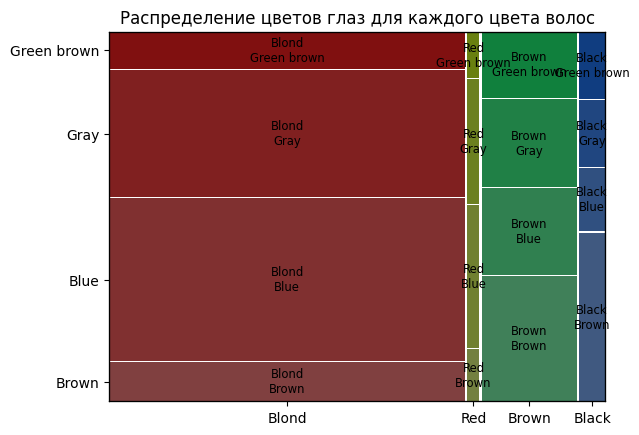

In [10]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['HairColor', 'EyeColor'])
plt.title('Распределение цветов глаз для каждого цвета волос')
plt.show()


**Вывод:** Блонд самый частый, как и голубые глаза. Однако для темных цветов волос (brown и black) коричневые глаза популярнее.

**г) [5 баллов]**. Рассчитайте суммы по столбцам, строкам, а также общую сумму. Рассчитайте тестовую $\chi^2$ для теста на независимость двух переменных. Определите степени свободы у распределения получившеся статистики, найдите критическое значение $\chi^2_{df}$ с помощью встроенной функции `.ppf()`

In [11]:
from scipy.stats import chi2, chi2_contingency

row_sums = contingency_table.sum(axis=1)
col_sums = contingency_table.sum(axis=0)
total_sum = contingency_table.values.sum()

expected = np.outer(row_sums, col_sums) / total_sum
chi2_stat = np.sum(np.sum((contingency_table - expected)**2 / expected))
dof = (len(row_sums) - 1) * (len(col_sums) - 1)

alpha = 0.1
critical_value = chi2.ppf(1 - alpha, dof)
p_val = chi2.sf(chi2_stat, dof)

print("Суммы по строкам:")
print(row_sums)
print("\nСуммы по столбцам:")
print(col_sums)
print("\nОбщая сумма:")
print(total_sum)
print("\nТестовая статистика χ²:", chi2_stat)
print("P-value:", p_val)
print("Степени свободы:", dof)
print("Критическое значение χ²:", critical_value)

Суммы по строкам:
HairColor
Black     25521
Blond    348816
Brown     92818
Red       11759
dtype: int64

Суммы по столбцам:
EyeColor
Blue           186033
Brown           82322
Gray           152104
Green brown     58455
dtype: int64

Общая сумма:
478914

Тестовая статистика χ²: 57013.66167038183
P-value: 0.0
Степени свободы: 9
Критическое значение χ²: 14.683656573259837


*Можете проверить себя, воспользовавшишь функцией `chi2_contingency()`*

In [12]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("\nТестовая статистика χ²:", chi2_stat)
print("P-value:", p_val)
print("Степени свободы:", dof)
print("Критическое значение χ²:", critical_value)


Тестовая статистика χ²: 57013.66167038183
P-value: 0.0
Степени свободы: 9
Критическое значение χ²: 14.683656573259837


**д) [3 балла]**. Постройте плотность распределения рассчитанной статистики, а найдите p-value точечной оценки, и обозначьте на графике. Также укажите несколько типичных уровней значимости $\alpha$ и нанесите их на график. Проинтерпретируйте результаты.

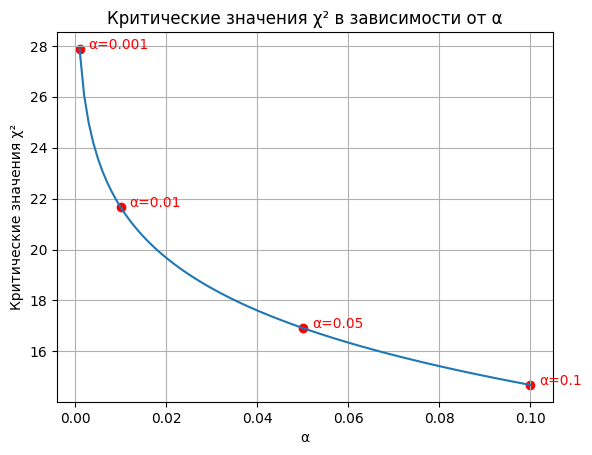

In [13]:
common_alpha_levels = [0.001, 0.01, 0.05, 0.1]
for alpha_level in common_alpha_levels:
    crit_value = chi2.ppf(1 - alpha_level, dof)
    plt.scatter(alpha_level, crit_value, color='r', marker='o')
    plt.text(alpha_level + 0.002, crit_value, f'α={alpha_level}', color='r', fontsize=10)
 
alphas = np.linspace(0.001, 0.1, 100)
crit_values = []
for alpha in alphas:
    crit_value = chi2.ppf(1 - alpha, dof)
    crit_values.append(crit_value)
plt.plot(alphas, crit_values)
plt.xlabel('α')
plt.ylabel('Критические значения χ²')
plt.title('Критические значения χ² в зависимости от α')
plt.grid(True)
plt.show() 
plt.show()

**Вывод**: Из графика видно, что с увеличением уровня значимости α критические значения χ² уменьшаются. Это означает, что при более высоком уровне значимости можно отвергнуть нулевую гипотезу при меньших значениях статистики χ². Например, для уровня значимости α=0.001 критическое значение χ² выше, чем для уровня α=0.1.

**е) [3 балла]**. Сделайте финальные выводы и при необходимости дополнительные расчеты, на которых они будут основываться. Есть ли стастистическая взаимосвязь между переменными. И если есть, то чем она может быть объяснена?

In [14]:
print(chi2_stat, critical_value)
print(p_val)

57013.66167038183 14.683656573259837
0.0


**Вывод**: Наблюдаемое значение гораздо больше критического, а также p-value равно нулю, а значит, что статистическая взаимосвязь есть, т.е цвет глаз и цвет волос связаны между собой. Эту связь сложно объяснить: могут влиять генетические, психологические, этнические и другие факторы, а может быть такое, что свзяь есть, а причины нет (correlation doesn't mean causation)

### Задача №3. Тестируем новый интерфейс страницы отеля  (25 баллов)

Все мы любим отдыхать! А злые корпорации любят наживаться на нашем желании отдыхать.

Представим что вы работаете в одной из таких корпораций и занимаетесь аналитикой сайта для бронирования отелей. Процесс бронирования имеет привычную структуру:
- вбиваете в поиск направленния и даты
- получаете выдачу вариантов отелей
- переходите на страницу отеля
- нажимаете кнопку "забронировать"
- попадаете на страницу оплаты
- оплачиваете

Очевидно, на всех этапах этой воронки вы можете потерять пользователя. Поисследовав поведение пользователей вы решили внести изменения на странице об отеле и хотите чтобы выросла конверсия в бронирования

__а) [3 балла]__ Подумайте, какие изменения могли бы быть внесены?

**Ваш ответ:** можно поменять принцип, по которому давались рекомендации, изменить расположение информации о сайте: где фото, где карта, где отзывы и тд., добавить информацию касательно отмены брони, возрата средств, рассказать о доп. услугах, которые может предложить отель.

Перед вами датасет `ab_test.csv`, в нем содержатся данные о пользователях в период теста

`user_id` - уникальный идентификатор пользователя \
`sex` - пол пользователя \
`datetime` - дата и время посещения сайта (начала сессии) \
`district` - регион расположения отеля \
`hotel_page` - был ли пользователь на странице отеля в сессии \
`payment_page` - был ли пользователь на странице оплаты в сессии \
`payment` - была ли произведена оплата в сессии \
`group` - группа в эксперименте

Поскольку изменения вносились на странице отеля нас интересуют именно дошедшие до этой страницы пользователи. Поэтому колонка `hotel_page` принимает значение 1 всегда

In [15]:
df = pd.read_csv("https://github.com/hse-econ-data-science/andan2024/raw/main/hw/data/ab_simpson.csv")

In [16]:
df.head(20)

,Unnamed: 0,user_id,sex,datetime,district,hotel_page,payment_page,payment,group
0,0,3326449108867616315,1,11/15/2023 12:02 AM,Южный федеральный округ,1,1,0,control
1,1,7887645543455909870,1,11/02/2023 09:12 PM,Центральный федеральный округ,1,1,0,control
2,2,6148146969124793824,1,11/10/2023 10:06 AM,Центральный федеральный округ,1,1,1,control
3,3,2721602951940155275,0,11/12/2023 07:10 PM,Центральный федеральный округ,1,1,0,control
4,4,1829030712785972138,0,05/01/2024 05:19 AM,Южный федеральный округ,1,0,0,test
5,5,4297437014880932627,0,11/01/2023 03:27 PM,Северо-Западный федеральный округ,1,1,0,control
6,6,4100265195187859669,0,04/30/2024 01:21 AM,Северо-Западный федеральный округ,1,1,0,test
7,7,5719379196868222430,0,11/15/2023 08:00 AM,Центральный федеральный округ,1,1,0,control
8,8,762074030987633548,0,05/02/2024 08:44 PM,Южный федеральный округ,1,1,0,test
9,9,737226736435153482,1,11/01/2023 10:18 PM,Южный федеральный округ,1,0,0,control


__б) [3 балла]__ Сделайте небольшой eda, какие выводы вы можете сделать о данных? Корректно ли проводился аб тест? Найдите ошибки и объясните почему это некорректно.

In [17]:
print(df.isnull().sum())

Unnamed: 0      0
user_id         0
sex             0
datetime        0
district        0
hotel_page      0
payment_page    0
payment         0
group           0
dtype: int64


In [18]:
print(df['sex'].value_counts(normalize=True))
print(df['district'].value_counts(normalize=True))
print(df['group'].value_counts(normalize=True))

0    0.500006
1    0.499994
Name: sex, dtype: float64
Южный федеральный округ              0.300515
Центральный федеральный округ        0.299487
Приволжский федеральный округ        0.150154
Северо-Западный федеральный округ    0.124615
Уральский федеральный округ          0.065178
Сибирский федеральный округ          0.039999
Дальневосточный федеральный округ    0.020052
Name: district, dtype: float64
test       0.502567
control    0.497433
Name: group, dtype: float64


In [19]:
df.groupby('group')['district'].value_counts(normalize=True)

group    district                         
control  Центральный федеральный округ        0.400001
         Южный федеральный округ              0.200003
         Северо-Западный федеральный округ    0.199998
         Приволжский федеральный округ        0.120002
         Сибирский федеральный округ          0.039996
         Уральский федеральный округ          0.029999
         Дальневосточный федеральный округ    0.010001
test     Южный федеральный округ              0.400000
         Центральный федеральный округ        0.200000
         Приволжский федеральный округ        0.179999
         Уральский федеральный округ          0.099998
         Северо-Западный федеральный округ    0.050001
         Сибирский федеральный округ          0.040003
         Дальневосточный федеральный округ    0.030000
Name: district, dtype: float64

Пропузенных значений нет, по полу распределение равномерное, по региону - примерно пропорционально их популярности и количеству, распределение по test-control также 50/50, что вполне корректно.

Но при этом есть случаи, когда человек не переходил на страницу, но оплатил. Такого не должно быть, но это ошибка в данных, но не в аб тесте

Ошибка аб-теста в том, что у нас разный баланс регионов в тестовой и контрольной выборках. Такого быть не должно, и это может привести к неправильным результатам.

Раскроем правду. Изменение продукта касалось адаптации страницы отеля под его регион. Например, в южных регионах пользователям на странице отеля предлагались активности для пляжного отдыха, а в северном и центральном регионе сразу подбирались ближайшие экскурсии и так далее.

__в) [5 баллов]__ Проанализируйте, как ведут себя конверсии в страницу оплаты и в оплату в разных регионах? Опишите выводы.

In [20]:
regions = df['district'].unique()

df_control = df.loc[df['group'] == 'control']
df_test = df.loc[df['group'] == 'test']

conversion_to_payment_page_control = df_control.groupby('district')['payment_page'].mean()
conversion_to_payment_control = df_control.groupby('district')['payment'].mean()
conversion_to_payment_page_test = df_test.groupby('district')['payment_page'].mean()
conversion_to_payment_test = df_test.groupby('district')['payment'].mean()

In [21]:
conversion_to_payment_page_control

district
Дальневосточный федеральный округ    0.100050
Приволжский федеральный округ        0.600000
Северо-Западный федеральный округ    0.700005
Сибирский федеральный округ          0.299975
Уральский федеральный округ          0.399933
Центральный федеральный округ        0.899999
Южный федеральный округ              0.800000
Name: payment_page, dtype: float64

In [22]:
conversion_to_payment_page_test

district
Дальневосточный федеральный округ    0.200066
Приволжский федеральный округ        0.649994
Северо-Западный федеральный округ    0.720016
Сибирский федеральный округ          0.320005
Уральский федеральный округ          0.450007
Центральный федеральный округ        0.930002
Южный федеральный округ              0.810001
Name: payment_page, dtype: float64

In [23]:
conversion_to_payment_control

district
Дальневосточный федеральный округ    0.232116
Приволжский федеральный округ        0.252074
Северо-Западный федеральный округ    0.251739
Сибирский федеральный округ          0.246310
Уральский федеральный округ          0.241161
Центральный федеральный округ        0.250772
Южный федеральный округ              0.249281
Name: payment, dtype: float64

In [24]:
conversion_to_payment_test

district
Дальневосточный федеральный округ    0.334764
Приволжский федеральный округ        0.334516
Северо-Западный федеральный округ    0.332079
Сибирский федеральный округ          0.330280
Уральский федеральный округ          0.330114
Центральный федеральный округ        0.331220
Южный федеральный округ              0.336395
Name: payment, dtype: float64

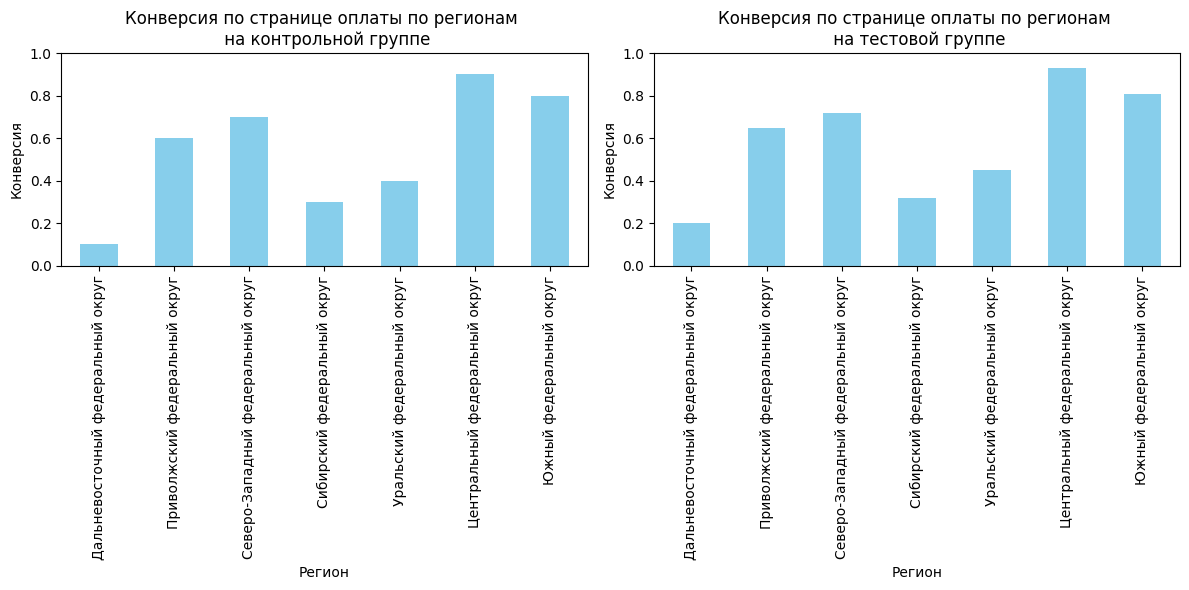

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
conversion_to_payment_page_control.plot(kind='bar', color='skyblue')
plt.title('Конверсия по странице оплаты по регионам \n на контрольной группе')
plt.xlabel('Регион')
plt.ylabel('Конверсия')
plt.ylim(0, 1)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
conversion_to_payment_page_test.plot(kind='bar', color='skyblue')
plt.title('Конверсия по странице оплаты по регионам \n на тестовой группе')
plt.xlabel('Регион')
plt.ylabel('Конверсия')
plt.ylim(0, 1)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Конверсия по странице оплаты выросла во всех регионах

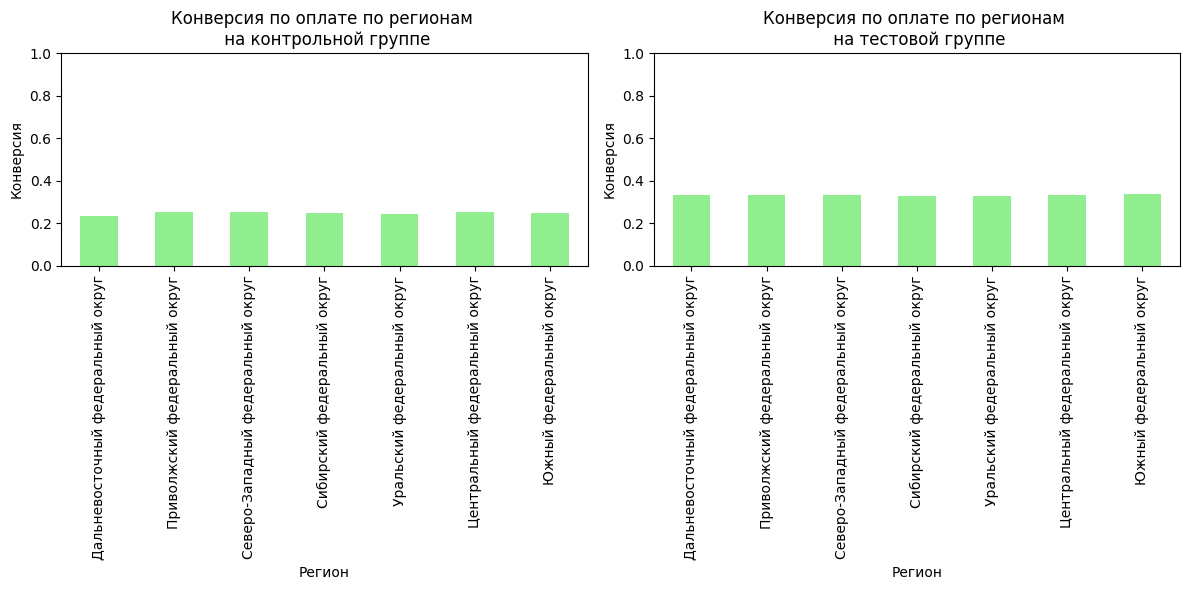

In [26]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
conversion_to_payment_control.plot(kind='bar', color='lightgreen')
plt.title('Конверсия по оплате по регионам \n на контрольной группе')
plt.xlabel('Регион')
plt.ylabel('Конверсия')
plt.ylim(0, 1)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
conversion_to_payment_test.plot(kind='bar', color='lightgreen')
plt.title('Конверсия по оплате по регионам \n на тестовой группе')
plt.xlabel('Регион')
plt.ylabel('Конверсия')
plt.ylim(0, 1)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Как и конверсия по оплате выросла во всех регионах.

__г) [5 баллов]__ Проанализируйте, улучшилась ли воронка для пользователей в тестовой группе по сравнению с контрольной вне зависимости от региона? Опишите выводы.

In [27]:
test_group_conversion = df_test[['payment_page', 'payment']].mean()
control_group_conversion = df_control[['payment_page', 'payment']].mean()

print("Конверсия в каждый этап воронки для тестовой группы:")
print(test_group_conversion)
print("Конверсия в каждый этап воронки для контрольной группы:")
print(control_group_conversion)

Конверсия в каждый этап воронки для тестовой группы:
payment_page    0.726803
payment         0.333885
dtype: float64
Конверсия в каждый этап воронки для контрольной группы:
payment_page    0.756999
payment         0.250170
dtype: float64


Конверсия на страницу оплаты упала, а на саму оплату - сильно выросла

__д) [5 баллов]__ Проанализируйте распределение интересов пользователей в тестовой и контрольной группе. Какими регионами они интересовались? Изменились ли их предпочтения?

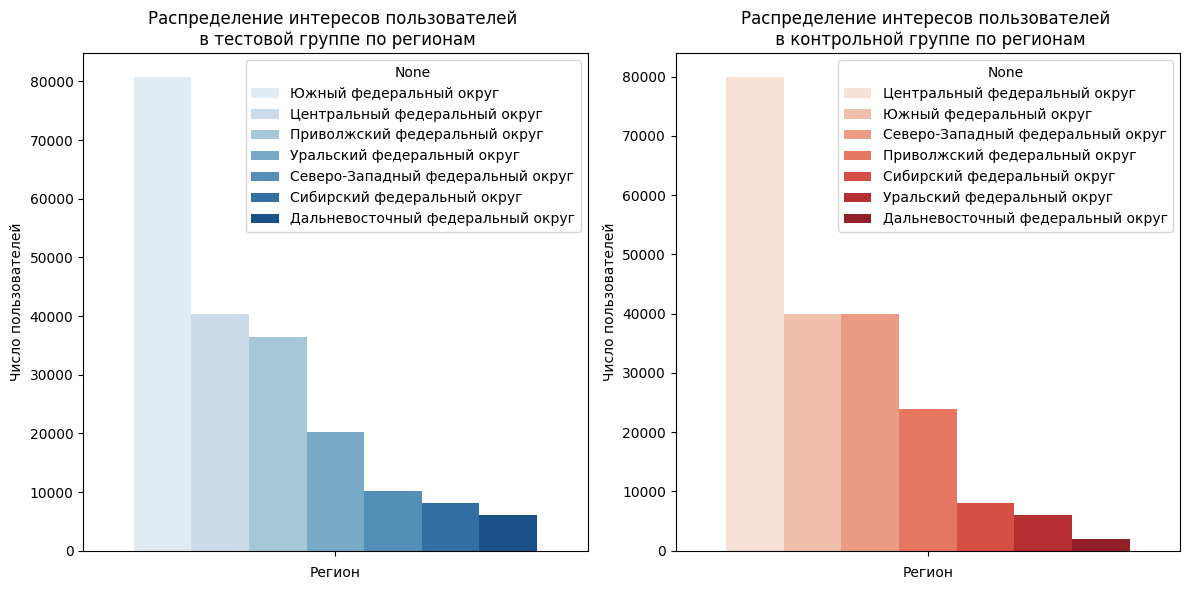

In [28]:
import seaborn as sns

test_group_region_counts = df_test['district'].value_counts()
control_group_region_counts = df_control['district'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(hue=test_group_region_counts.index, y=test_group_region_counts.values, palette='Blues')
plt.title('Распределение интересов пользователей \n в тестовой группе по регионам')
plt.xlabel('Регион')
plt.ylabel('Число пользователей')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(hue=control_group_region_counts.index, y=control_group_region_counts.values, palette='Reds')
plt.title('Распределение интересов пользователей \n в контрольной группе по регионам')
plt.xlabel('Регион')
plt.ylabel('Число пользователей')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Предпочтения поменялись. В тестовой самым популярным округом стал Южный, а потом Центральный, а в контрольной наоборот. Приволжский прибавил в популярности, а Северо-Западный - сильно потерял.

Если вы все сделали правильно, то у вас получился противоречивые ответы в пунктах 3 и 4. Вы попали в ловушку Парадокса Симпсона. Подробнее о нем можно почитать [здесь](https://ru.wikipedia.org/wiki/Парадокс_Симпсона)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='center'> 

__е) [4 балла]__ Теперь, когда вы все узнали, опишите кратко почему вы получили противоречивый результат в пунктах 3 и 4 (1 балл)

**Ваш ответ:** Дело в том, что поменялся баланс классов, о чем я сказал еще в 1 пункте. Из-за это у нас упала суммарная конверсия по переходу на сайт оплаты, хотя во всех регионах конверсия по переходу на сайт оплаты выросла. 

При этом выросла в обоих случаях выросла конверсия по оплате, и для создателей сайта и владельцев отелей это лучше)

## Задача №4: Не подглядывать! (40 баллов)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [29]:
from scipy.stats import norm
import math

alpha = 0.05
beta = 0.2

z_alpha = norm.ppf(1 - alpha/2)
z_beta = norm.ppf(1 - beta)

mu_A = 100  
sigma_A = 40 
sigma_B = 20 
MDE = 5 

n_one_group = ((sigma_A**2 + sigma_B**2) * (z_alpha + z_beta)**2) / MDE**2

daily_visits = 200
#я понял условие так, что мы делаем 2 равные группы 
days_needed = n_one_group * 2 / daily_visits

days_needed = math.ceil(days_needed)

print("Размер выборки для одной группы:", n_one_group)
print("Количество дней:", days_needed)

Размер выборки для одной группы: 627.9103787479271
Количество дней: 7


__б) [20 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

Важно: раз уж мы делаем тест на 7 дней, то пусть мы тогда сделаем сумму 2 групп 1400, а значит в одной - 700

In [30]:
mu_A = 100
sigma_A = 40 

mu_B = 105 
sigma_B = 20 

n_one_group = int(daily_visits * days_needed / 2)

sample_A = np.random.normal(mu_A, sigma_A, size=n_one_group)
sample_B = np.random.normal(mu_B, sigma_B, size=n_one_group)

sample_A.mean(), sample_B.mean()


(100.57427769865599, 105.39694530327517)

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [31]:
from scipy.stats import ttest_ind

def collect_data(days, sample_A, sample_B):
    days_list = []
    mean_A_list = []
    mean_B_list = []
    p_value_list = []
    
    for day in range(1, days + 1):
        sample_A_day = sample_A[:int(day*daily_visits/2)]
        sample_B_day = sample_B[:int(day*daily_visits/2)]
        
        mean_A = sample_A_day.mean()
        mean_B = sample_B_day.mean()
        
        _, p_value = ttest_ind(sample_A_day, sample_B_day)
        
        days_list.append(day)
        mean_A_list.append(mean_A)
        mean_B_list.append(mean_B)
        p_value_list.append(float(f"{p_value:.3f}"))
    
    data = pd.DataFrame({
        'Day': days_list,
        'Mean_A': mean_A_list,
        'Mean_B': mean_B_list,
        'P_value': p_value_list
    })
    
    return data

X = 50

sample_A = np.random.normal(mu_A, sigma_A, size=int(X * daily_visits / 2))
sample_B = np.random.normal(mu_B, sigma_B, size=int(X * daily_visits / 2))

test_data = collect_data(X, sample_A, sample_B)

test_data

,Day,Mean_A,Mean_B,P_value
0,1,99.052072,107.864050,0.052
1,2,102.074786,106.881820,0.143
2,3,100.804047,105.853687,0.057
3,4,100.862555,106.006075,0.024
4,5,100.991678,106.647905,0.006
5,6,101.122760,106.383134,0.005
6,7,100.000592,106.499459,0.000
7,8,100.252679,106.872077,0.000
8,9,100.299514,106.639451,0.000
9,10,100.184656,106.707949,0.000


3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

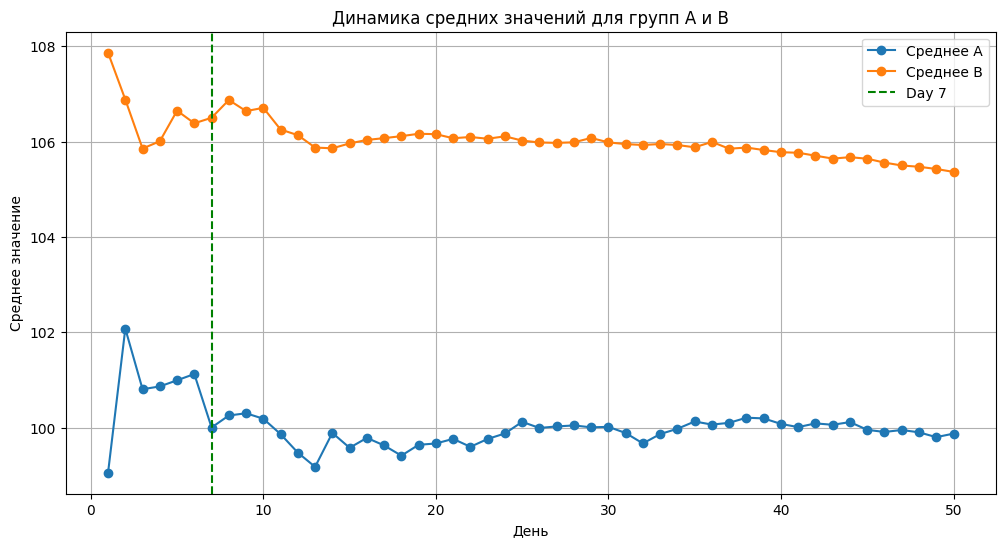

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Day'], test_data['Mean_A'], label='Среднее A', marker='o')
plt.plot(test_data['Day'], test_data['Mean_B'], label='Среднее B', marker='o')

plt.axvline(x=days_needed, color='green', linestyle='--', label=f'Day {days_needed}')

plt.xlabel('День')
plt.ylabel('Среднее значение')
plt.title('Динамика средних значений для групп A и B')
plt.legend()
plt.grid(True)

plt.show()

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

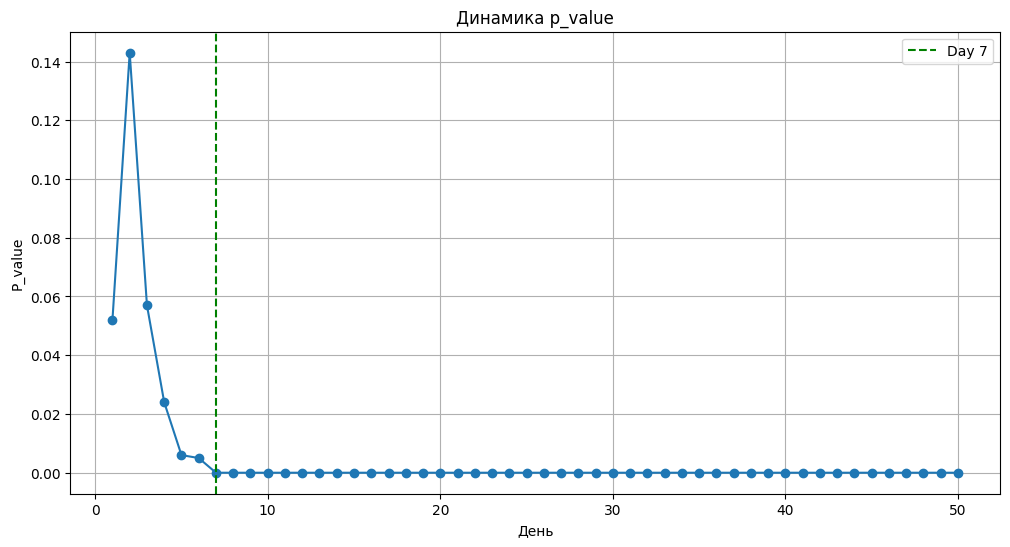

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Day'], test_data['P_value'], marker='o')
plt.axvline(x=days_needed, color='green', linestyle='--', label=f'Day {days_needed}')
plt.xlabel('День')
plt.ylabel('P_value')
plt.title('Динамика p_value')
plt.legend()
plt.grid(True)

plt.show()

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

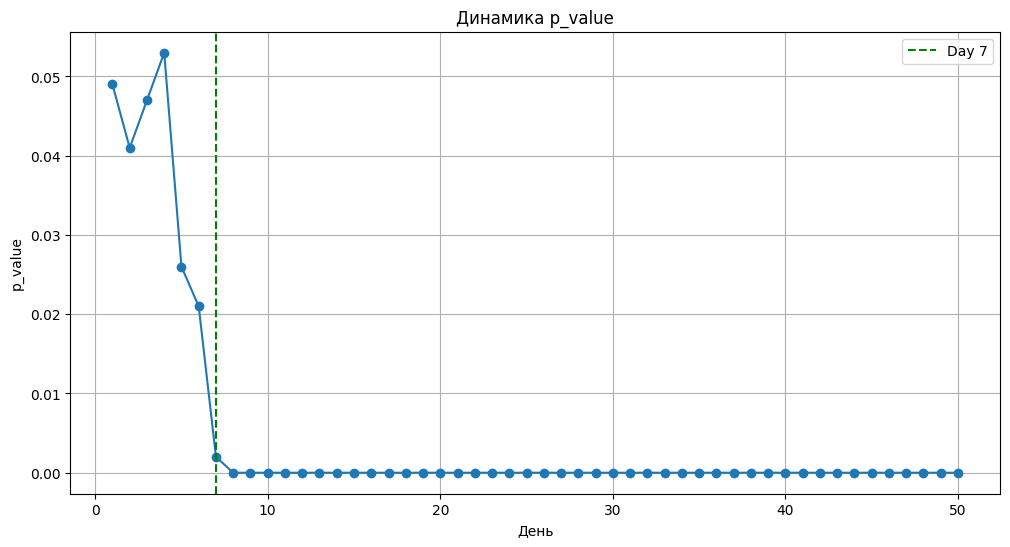

In [34]:
def collect_data(days, sample_A, sample_B):
    days_list = []
    mean_A_list = []
    mean_B_list = []
    p_value_list = []
    
    for day in range(1, days + 1):
        sample_A_day = sample_A[:int(day*daily_visits/2)]
        sample_B_day = sample_B[:int(day*daily_visits/2)]
        
        mean_A = sample_A_day.mean()
        mean_B = sample_B_day.mean()
        
        _, p_value = ttest_ind(sample_A_day, sample_B_day)
        
        days_list.append(day)
        mean_A_list.append(mean_A)
        mean_B_list.append(mean_B)
        p_value_list.append(float(f"{p_value:.3f}"))
    
    data = pd.DataFrame({
        'Day': days_list,
        'Mean_A': mean_A_list,
        'Mean_B': mean_B_list,
        'P_value': p_value_list
    })
    
    return data

X = 50

sample_A = np.random.normal(mu_A, sigma_A, size=int(X * daily_visits / 2))
sample_B = np.random.normal(mu_B, sigma_B, size=int(X * daily_visits / 2))

test_data = collect_data(X, sample_A, sample_B)

plt.figure(figsize=(12, 6))
plt.plot(test_data['Day'], test_data['P_value'], marker='o')
plt.axvline(x=days_needed, color='green', linestyle='--', label=f'Day {days_needed}')
plt.xlabel('День')
plt.ylabel('p_value')
plt.title('Динамика p_value')
plt.legend()
plt.grid(True)

plt.show()

В большинстве случаев происходит так:

- P-value до кол-ва дней из п.1 постепенно падает до нуля, при этом кол-ве дней p-value примерно равно нулю, и дальше оно остается на том же уровне.

Иногда получется так:

- P-value до кол-ва дней из п.1 падает до нуля, но при этом колеблется, при этом кол-ве дней p-value примерно равно нулю или очень низким, и дальше оно сначала снова колеблется, а потом падает до нуля и далее остается на том же уровне.

Но один раз вышло так:

- P-value сильно скакало, P-value дошло до 1 при кол-ве дней из п.1, а после этого P-value медленно падал до нуля. Но, кажется, это на грани выброса, так что воспринимать этот случай всерьез.

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

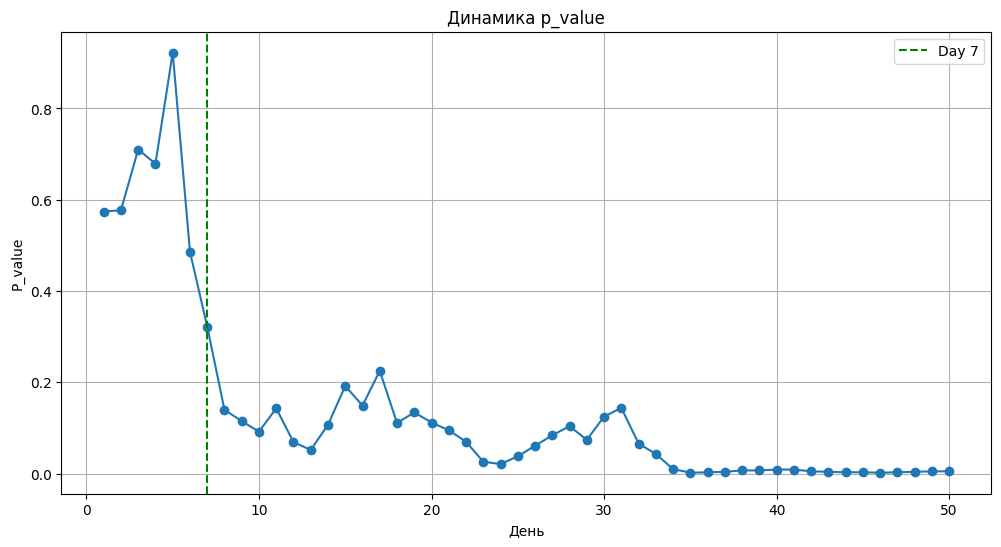

In [35]:
mu_A = 100
sigma_A = 40 

mu_B = 101
sigma_B = 20 

def collect_data(days, sample_A, sample_B):
    days_list = []
    mean_A_list = []
    mean_B_list = []
    p_value_list = []
    
    for day in range(1, days + 1):
        sample_A_day = sample_A[:int(day*daily_visits/2)]
        sample_B_day = sample_B[:int(day*daily_visits/2)]
        
        mean_A = sample_A_day.mean()
        mean_B = sample_B_day.mean()
        
        _, p_value = ttest_ind(sample_A_day, sample_B_day)
        
        days_list.append(day)
        mean_A_list.append(mean_A)
        mean_B_list.append(mean_B)
        p_value_list.append(float(f"{p_value:.3f}"))
    
    data = pd.DataFrame({
        'Day': days_list,
        'Mean_A': mean_A_list,
        'Mean_B': mean_B_list,
        'P_value': p_value_list
    })
    
    return data

X = 50

sample_A = np.random.normal(mu_A, sigma_A, size=int(X * daily_visits / 2))
sample_B = np.random.normal(mu_B, sigma_B, size=int(X * daily_visits / 2))

test_data = collect_data(X, sample_A, sample_B)

plt.figure(figsize=(12, 6))
plt.plot(test_data['Day'], test_data['P_value'], marker='o')
plt.axvline(x=days_needed, color='green', linestyle='--', label=f'Day {days_needed}')
plt.xlabel('День')
plt.ylabel('P_value')
plt.title('Динамика p_value')
plt.legend()
plt.grid(True)

plt.show()

P-value всегда сильно колеблется, но всегда по-разному: в большинстве случаев колеблется на протяжение всего графика, и в кол-ве дней из п.1 больше 0.1, то есть уровня значимости и в 10% и в 5%. Но иногда, но уже реже, чем при MDE=5, график быстро достигает нуля и дальше остается на этом же уровне.

__в) [10 баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

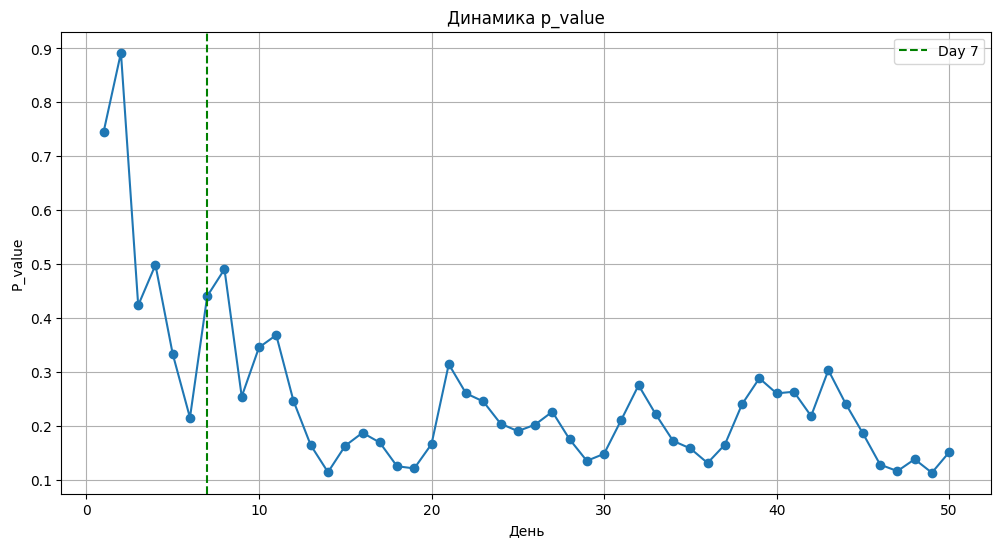

In [36]:
mu_A = 100
sigma_A = 40 
mu_B = 100
sigma_B = 20 

def collect_data(days, sample_A, sample_B):
    days_list = []
    mean_A_list = []
    mean_B_list = []
    p_value_list = []
    
    for day in range(1, days + 1):
        sample_A_day = sample_A[:int(day*daily_visits/2)]
        sample_B_day = sample_B[:int(day*daily_visits/2)]
        
        mean_A = sample_A_day.mean()
        mean_B = sample_B_day.mean()
        
        _, p_value = ttest_ind(sample_A_day, sample_B_day)
        
        days_list.append(day)
        mean_A_list.append(mean_A)
        mean_B_list.append(mean_B)
        p_value_list.append(float(f"{p_value:.3f}"))
    
    data = pd.DataFrame({
        'Day': days_list,
        'Mean_A': mean_A_list,
        'Mean_B': mean_B_list,
        'P_value': p_value_list
    })
    
    return data

X = 50

sample_A = np.random.normal(mu_A, sigma_A, size=int(X * daily_visits / 2))
sample_B = np.random.normal(mu_B, sigma_B, size=int(X * daily_visits / 2))

test_data = collect_data(X, sample_A, sample_B)

plt.figure(figsize=(12, 6))
plt.plot(test_data['Day'], test_data['P_value'], marker='o')
plt.axvline(x=days_needed, color='green', linestyle='--', label=f'Day {days_needed}')
plt.xlabel('День')
plt.ylabel('P_value')
plt.title('Динамика p_value')
plt.legend()
plt.grid(True)

plt.show()

P-value очень сильно колеблется, и почти всегда в точке из п.1 больше уровня значимости. Но иногда p-value меньше уровня значимости. Это может объясняться случайностью и различиями в дисперсии.

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

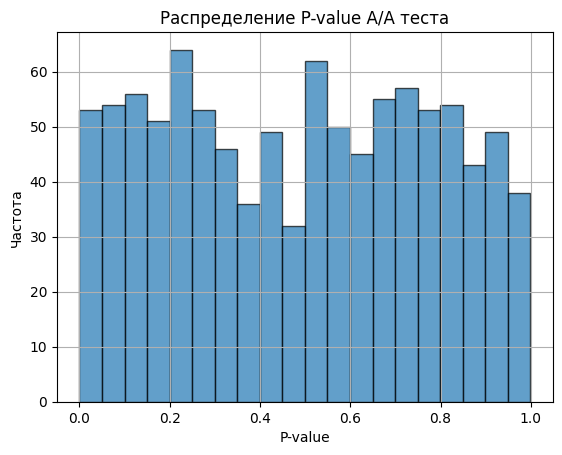

Среднее значение p-value: 0.4881604568950534
Дисперсия p-value: 0.08346053427088439


In [37]:
mu_A = 100
sigma_A = 40
mu_B = 100
sigma_B = 20
days = 50
daily_visits = 200
iterations = 1000

def generate_p_value(big_sample_A, big_sample_B, days, daily_visits, i):
    sample_A = big_sample_A[i * int(days * daily_visits / 2):(i + 1) * int(days * daily_visits / 2)]
    sample_B = big_sample_B[i * int(days * daily_visits / 2):(i + 1) * int(days * daily_visits / 2)]
    _, p_value = ttest_ind(sample_A, sample_B)
    
    return p_value

big_sample_A = np.random.normal(mu_A, sigma_A, size=int(days * daily_visits / 2 * iterations))
big_sample_B = np.random.normal(mu_B, sigma_B, size=int(days * daily_visits / 2 * iterations))

p_values = [
    generate_p_value(
        big_sample_A,
        big_sample_B,
        days,
        daily_visits, i
    ) 
    for i in range(iterations)
]

plt.hist(p_values, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('P-value')
plt.ylabel('Частота')
plt.title('Распределение P-value A/A теста')
plt.grid(True)
plt.show()

print("Среднее значение p-value:", np.mean(p_values))
print("Дисперсия p-value:", np.var(p_values))

Распределение практически равномерное. Это в целом логично, учитывая то, что у выборок одинаковое среднее, и различия только за счет разной дисперсии. Но при этом в 90-95% случаев (в зависимости от уровня значимости) гипотеза о равенстве средних подтверждается.